# Text Mining of newspaper articles

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv('final_result.csv')

In [3]:
data = data.sample(frac=1).reset_index(drop=True)

In [4]:
data.head(10)

,Title,Url,Date,Author,Category,Text
0,Annadurai to Thambidurai: Rise & fall of rebel...,https://newstodaynet.com/2019/01/26/annadurai-...,"January 26, 2019",M Bhaskar Sai,Politics,Annadurai and Periyar\nAnnadurai and Karunanid...
1,Vidya Balan’s Sherni to release on Amazon Prime,https://newstodaynet.com/2021/05/18/vidya-bala...,"May 18, 2021",Agency,Entertainment,Vidya Balan-starrer Sherni is slated to be rel...
2,What makes north Chennai hotbed of politics & ...,https://newstodaynet.com/2018/08/29/what-makes...,"August 29, 2018",M Bhaskar Sai,Politics,"Chennai: Like North Chennai films, the politic..."
3,"As corona cases rise, crime rates fall",https://newstodaynet.com/2020/04/06/as-corona-...,"April 6, 2020",Naomi N,Crimes,Chennai: The city is at its safest ever since ...
4,FM exhorts India Inc to open up their purse fo...,https://www.dailypioneer.com/2022/business/fm-...,"Sunday, 06 February 2022",PTI,Business,Finance Minister Nirmala Sitharaman on Saturda...
5,MGR Magan to release in Hotstar,https://newstodaynet.com/2021/10/21/mgr-magan-...,"October 21, 2021",NT Bureau,Entertainment,Actor Sasikumar and Sathyaraj starrer MGR Maga...
6,‘Jai Bhim’: Vanniyar Sangam issues legal notic...,https://newstodaynet.com/2021/11/15/jai-bhim-v...,"November 15, 2021",NT Bureau,Entertainment,Chennai: Following allegations that Suriya sta...
7,"EPS, OPS take tough stand against Sasikala",https://newstodaynet.com/2021/06/15/eps-ops-ta...,"June 15, 2021",NT Bureau,Politics,Chennai: The AIADMK has hit out at its expelle...
8,Businesses & organisations react to 2020 Budget,https://newstodaynet.com/2020/02/03/businesses...,"February 3, 2020",NT Bureau,Business,"MM Murugappan, Executive Chairman, Murugappa G..."
9,Koo zooms past 1 crore downloads,https://newstodaynet.com/2021/08/28/koo-zooms-...,"August 28, 2021",NT Bureau,Sports,"Chennai: Koo, India’s multi-language micro-blo..."


In [5]:
data.shape

(1008, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     1008 non-null   object
 1   Url       1008 non-null   object
 2   Date      1008 non-null   object
 3   Author    1008 non-null   object
 4   Category  1008 non-null   object
 5   Text      1008 non-null   object
dtypes: object(6)
memory usage: 47.4+ KB


In [7]:
data['Category'].value_counts()

Sports           180
Politics         178
Crimes           173
Entertainment    161
Technology       158
Business         158
Name: Category, dtype: int64

In [8]:
target=data['Category'].unique()

In [9]:
print(target)

['Politics' 'Entertainment' 'Crimes' 'Business' 'Sports' 'Technology']


In [10]:
import matplotlib.pyplot as plt

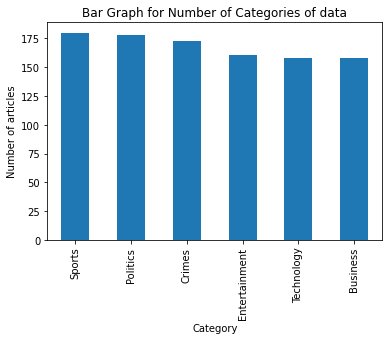

In [11]:
data.Category.value_counts().plot(kind="bar")
plt.xlabel("Category")
plt.ylabel("Number of articles")
plt.title("Bar Graph for Number of Categories of data")
plt.show()

## Data Preprocessing

### Removing HTML tags if present

In [12]:
import re
def removehtmltags(text):
    tag = re.compile(r'')
    return re.sub(tag,'',text)
data['Text'] = data['Text'].apply(removehtmltags)

### Removing Special Characters

In [13]:
def removespecialchars(text):
    t=''
    for x in text:
        if x.isalnum():
            t=t+x
        else:
            t=t+' '
    return t
data['Text'] = data['Text'].apply(removespecialchars)

### Converting into lowercase

In [14]:
def low(text):
    return text.lower()
data['Text'] = data['Text'].apply(low)

### Removing stopwords

In [15]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [16]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
def removingstopwords(text):
    li=[]
    stowords = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    for i in words:
        if i not in stowords:
            li.append(i)
    return li
data['Text'] = data['Text'].apply(removingstopwords)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\RAJASEKHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
def wordlemmatizer(text):
    li=[]
    wordnet = WordNetLemmatizer()
    for i in text:
        li.append(wordnet.lemmatize(i))
    return " ".join(li)
data['Text'] = data['Text'].apply(wordlemmatizer)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\RAJASEKHAR\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [18]:
data

,Title,Url,Date,Author,Category,Text
0,Annadurai to Thambidurai: Rise & fall of rebel...,https://newstodaynet.com/2019/01/26/annadurai-...,"January 26, 2019",M Bhaskar Sai,Politics,annadurai periyar annadurai karunanidhi chenna...
1,Vidya Balan’s Sherni to release on Amazon Prime,https://newstodaynet.com/2021/05/18/vidya-bala...,"May 18, 2021",Agency,Entertainment,vidya balan starrer sherni slated released ama...
2,What makes north Chennai hotbed of politics & ...,https://newstodaynet.com/2018/08/29/what-makes...,"August 29, 2018",M Bhaskar Sai,Politics,chennai like north chennai film politics surro...
3,"As corona cases rise, crime rates fall",https://newstodaynet.com/2020/04/06/as-corona-...,"April 6, 2020",Naomi N,Crimes,chennai city safest ever since 24 march police...
4,FM exhorts India Inc to open up their purse fo...,https://www.dailypioneer.com/2022/business/fm-...,"Sunday, 06 February 2022",PTI,Business,finance minister nirmala sitharaman saturday e...
...,...,...,...,...,...,...
1003,Editorial: Capitol letters,https://newstodaynet.com/2022/01/03/editorial-...,"January 3, 2022",NT Bureau,Crimes,one year violent assault u capitol american re...
1004,WHO to vaccinate 40% population of every natio...,https://newstodaynet.com/2021/10/08/who-to-vac...,"October 8, 2021",Agency,Technology,tedros adhanom ghebreyesus geneva world health...
1005,"Soorarai Pottru to be remade in Hindi, Sudha K...",https://newstodaynet.com/2021/07/12/soorarai-p...,"July 12, 2021",Agency,Entertainment,suriya film soorarai pottru set bollywood rema...
1006,Voices of people are suppressed: Rahul Gandhi,https://newstodaynet.com/2021/09/04/voices-of-...,"September 4, 2021",NT Bureau,Politics,new delhi congress mp rahul gandhi said traged...


In [19]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
x = np.array(data.iloc[:,0].values)
y = np.array(data.Category.values)
cv = TfidfVectorizer(max_features = 1000)
x = cv.fit_transform(data.Text).toarray()
tf_feature_names = cv.get_feature_names()
print("X.shape = ",x.shape)
print("y.shape = ",y.shape)

X.shape =  (1008, 1000)
y.shape =  (1008,)


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, shuffle = True)
print(len(x_train))
print(len(x_test))

705
303


In [22]:
pip install sklearn

Note: you may need to restart the kernel to use updated packages.


In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
model1 = KNeighborsClassifier(n_neighbors=6)
oneVsRest = OneVsRestClassifier(model1)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred,average='macro') * 100
recall = recall_score(y_test, y_pred,average='macro') * 100
print(f'Accuracy: % {accuracy}')
print(f'Precision: % {precision}')
print(f'Recall: %{recall}')

Accuracy: % 69.3069306930693
Precision: % 69.53227334169468
Recall: %69.39407263395422


In [24]:
from sklearn.naive_bayes import MultinomialNB
model2=MultinomialNB()
oneVsRest = OneVsRestClassifier(model2)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred,average='macro') * 100
recall = recall_score(y_test, y_pred,average='macro') * 100
print(f'Accuracy: % {accuracy}')
print(f'Precision: % {precision}')
print(f'Recall: %{recall}')

Accuracy: % 76.56765676567657
Precision: % 76.55769517838483
Recall: %76.59641440109858


In [25]:
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
oneVsRest = OneVsRestClassifier(model3)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred,average='macro') * 100
recall = recall_score(y_test, y_pred,average='macro') * 100
print(f'Accuracy: % {accuracy}')
print(f'Precision: % {precision}')
print(f'Recall: %{recall}')

Accuracy: % 76.56765676567657
Precision: % 79.68902928549167
Recall: %75.99874919227247


In [26]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
oneVsRest = OneVsRestClassifier(model4)
oneVsRest.fit(x_train, y_train)
y_pred = oneVsRest.predict(x_test)
accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred,average='macro') * 100
recall = recall_score(y_test, y_pred,average='macro') * 100
print(f'Accuracy: % {accuracy}')
print(f'Precision: % {precision}')
print(f'Recall: %{recall}')

Accuracy: % 86.46864686468648
Precision: % 86.55610445924972
Recall: %86.41164827331627


In [27]:
classifier = RandomForestClassifier().fit(x_train, y_train)
y_pred1 = cv.transform(['James Anderson and Stuart Broad, England two leading Test wicket-takers of all time, were the headline names in a ruthless post-Ashes cull for next months tour of the West Indies.The fast-bowling greats received no assurances that they still had Test careers, either.England, on the heels of an off-field clear-out that accounted for the head coach, assistant coach and director of cricket, also dropped eight players following the 4-0 loss in the series in Australia.As well as Anderson, Broad and vice-captain Jos Buttler, the following players were also omitted: Dawid Malan, Sam Billings, Dom Bess, Rory Burns and Haseeb Hameed.'])
predicted = classifier.predict(y_pred1)

In [28]:
predicted

array(['Sports'], dtype=object)

In [29]:
y_pred2 = cv.transform(['Wellington: New Zealand Police Minister Poto Williams said on Friday that the country is continuing its relentless crackdown on gangs and organized crime.The government has never been more active in cracking down on gangs and organized crime, and getting gang leaders off our streets, Williams said in a statement. The success of Operation Tauwhiro shows the impact the government’s record investment in police continues to have, the Minister said, adding there are 700 additional officers alone to be focused on organized crime, reports Xinhua news agency. Gangs destroy lives, but we will not let them destroy communities, Williams said, adding Operation Tauwhiro will continue to disrupt and prevent firearm-related violence by criminal gangs and organized crime groups. The government has already committed to introducing Firearms Prohibition Orders to protect the public from firearms harm, the Minister said. By amending the Criminal Proceeds Act, the police have been given new powers to seize assets from organized criminals, according to Williams. He added that the police have seized NZ$500 million ($353 million) in cash and assets from gangs in the last four years.'])
predicted = classifier.predict(y_pred2)

In [30]:
predicted

array(['Crimes'], dtype=object)

In [31]:
y_pred3 = cv.transform(['Chennai: Expelled AIADMK general secretary V K Sasikala, in her recent telephone call to a party functionary, has revealed the ‘reason’ behind her decision to step back from politics after her return from the Bengaluru prison last year on serving her four-year term in the disproportionate assets case. “When they (AIADMK joint coordinator Edappadi K Palaniswami and coordinator O Panneerselvam) claimed they would win 150 seats in the Assembly election, I decided to give them a chance and stepped back. But we were defeated. So, I decided to come back and strengthen the party and get back the glorious days,” she said. Meanwhile, the main opposition AIADMK is likely to make an announcement soon to hold internal elections. According to sources, the massive exercise will go on for the next six months. This comes at a time when Sasikala is making desperate comeback attempt. Though the AIADMK is still smarting under the Assembly election defeat, Palaniswami has managed to stonewall Sasikala’s every effort to make a comeback. However, Sasikala had recently said that she has no plans of giving up on the case filed against the AIADMK general body meeting.'])
predicted = classifier.predict(y_pred3)

In [32]:
predicted

array(['Politics'], dtype=object)

In [33]:
from sklearn.cluster import KMeans

C:\Users\RAJASEKHAR\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


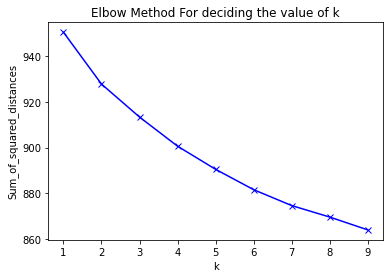

In [34]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(x)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For deciding the value of k')
plt.show()

In [35]:
true_k = 5
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=5)
model.fit(x)
labels=model.labels_
cl=pd.DataFrame(list(zip(data['Category'],labels)),columns=['title','cluster'])
print(cl.sort_values(by=['cluster']))

             title  cluster
466       Business        0
112       Business        0
777       Business        0
778       Business        0
475         Crimes        0
..             ...      ...
723       Business        4
140     Technology        4
471       Business        4
462     Technology        4
333  Entertainment        4

[1008 rows x 2 columns]


In [36]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':data.Text}
result=pd.DataFrame(result)
for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    print('Cluster: {}'.format(k))
    print('Titles')
    titles=cl[cl.cluster==k]['title']         
    print(titles.to_string(index=False))

Cluster: 0
Titles
     Business
       Crimes
       Crimes
Entertainment
     Business
   Technology
     Business
   Technology
     Business
   Technology
     Business
     Business
   Technology
     Business
       Crimes
     Business
       Crimes
   Technology
       Sports
     Business
     Business
     Business
     Business
     Business
       Sports
     Business
     Business
     Business
     Business
     Business
Entertainment
     Business
     Business
       Crimes
     Business
     Business
     Business
     Business
       Crimes
   Technology
Entertainment
     Business
     Business
     Business
       Crimes
     Business
     Business
     Business
       Sports
     Business
     Business
     Business
     Business
Entertainment
     Business
   Technology
   Technology
Entertainment
     Business
     Business
     Business
     Business
     Business
   Technology
   Technology
     Business
     Business
     Business
     Business
     Business
  

Cluster: 3
Titles
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
   Technology
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
Entertainment
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
       Sports
   Technology
Entertainment
  

In [37]:
y_pred = cv.transform(['James Anderson and Stuart Broad, England two leading Test wicket-takers of all time, were the headline names in a ruthless post-Ashes cull for next months tour of the West Indies.The fast-bowling greats received no assurances that they still had Test careers, either.England, on the heels of an off-field clear-out that accounted for the head coach, assistant coach and director of cricket, also dropped eight players following the 4-0 loss in the series in Australia.As well as Anderson, Broad and vice-captain Jos Buttler, the following players were also omitted: Dawid Malan, Sam Billings, Dom Bess, Rory Burns and Haseeb Hameed.'])
predicted = model.predict(y_pred)
predicted

array([3])

In [38]:
y_pred5 = cv.transform(['Wellington: New Zealand Police Minister Poto Williams said on Friday that the country is continuing its relentless crackdown on gangs and organized crime.The government has never been more active in cracking down on gangs and organized crime, and getting gang leaders off our streets, Williams said in a statement. The success of Operation Tauwhiro shows the impact the government’s record investment in police continues to have, the Minister said, adding there are 700 additional officers alone to be focused on organized crime, reports Xinhua news agency. Gangs destroy lives, but we will not let them destroy communities, Williams said, adding Operation Tauwhiro will continue to disrupt and prevent firearm-related violence by criminal gangs and organized crime groups. The government has already committed to introducing Firearms Prohibition Orders to protect the public from firearms harm, the Minister said. By amending the Criminal Proceeds Act, the police have been given new powers to seize assets from organized criminals, according to Williams. He added that the police have seized NZ$500 million ($353 million) in cash and assets from gangs in the last four years.'])
predicted = model.predict(y_pred5)
predicted

array([1])

In [39]:
y_pred6 = cv.transform(['Chennai: Expelled AIADMK general secretary V K Sasikala, in her recent telephone call to a party functionary, has revealed the ‘reason’ behind her decision to step back from politics after her return from the Bengaluru prison last year on serving her four-year term in the disproportionate assets case. “When they (AIADMK joint coordinator Edappadi K Palaniswami and coordinator O Panneerselvam) claimed they would win 150 seats in the Assembly election, I decided to give them a chance and stepped back. But we were defeated. So, I decided to come back and strengthen the party and get back the glorious days,” she said. Meanwhile, the main opposition AIADMK is likely to make an announcement soon to hold internal elections. According to sources, the massive exercise will go on for the next six months. This comes at a time when Sasikala is making desperate comeback attempt. Though the AIADMK is still smarting under the Assembly election defeat, Palaniswami has managed to stonewall Sasikala’s every effort to make a comeback. However, Sasikala had recently said that she has no plans of giving up on the case filed against the AIADMK general body meeting.'])
predicted = model.predict(y_pred6)
predicted

array([1])

In [40]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=42,max_iter=1) 
lda_top=lda_model.fit_transform(x)

In [41]:
print("1st Article:")
for i,topic in enumerate(lda_top[1007]):
    print("Topic ",i,": ",topic*100,"%")

1st Article:
Topic  0 :  1.8500706504949358 %
Topic  1 :  1.850081892827825 %
Topic  2 :  1.8501225944745938 %
Topic  3 :  1.8501626714668813 %
Topic  4 :  1.8501401821560262 %
Topic  5 :  1.8501610814185907 %
Topic  6 :  1.8500688119067445 %
Topic  7 :  1.8501086269345701 %
Topic  8 :  1.8500673614603145 %
Topic  9 :  83.34901612685952 %


In [42]:
vocab = cv.get_feature_names()
for i, comp in enumerate(lda_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:5]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print()

Topic 0: 
sport tourism university bjp gain 
Topic 1: 
state committed cent per bjp 
Topic 2: 
aiadmk palaniswami party sasikala dmk 
Topic 3: 
police medal woman arrested said 
Topic 4: 
court party bjp minister congress 
Topic 5: 
film said usd company per 
Topic 6: 
category sponsored iit madras student 
Topic 7: 
said governor candidate minister per 
Topic 8: 
court government said police kohli 
Topic 9: 
said film india per cent 
